In [1]:
# from __future__ import division
import numpy as np
from scipy import stats
import scipy.spatial as spa
import numpy.random as rnd
import copy
import time
import pandas as pd
import math
import pickle
import seaborn as sns
import os

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_fit_data(file_list):
    
    total_fit_mean = []
    total_fit_std = []
    
    
    for i in file_list:
        f = pd.read_csv(i,dtype=str)
    
        fit_mean = []
        fit_std = []

    
        fit_mean.extend(list(pd.Series(f.PopMeanFit_Mean,dtype=float)))
        fit_std.extend(list(pd.Series(f.PopMeanFit_STD,dtype=float)))
    
               
        total_fit_mean.append(fit_mean)
        total_fit_std.append(fit_std)
    

    return total_fit_mean, total_fit_std

In [3]:
def get_pop_mut_data(file_list):
    
    total_pop_fix_mean = []
    total_pop_fix_std = []
    
    total_pop_wt_mean = []
    total_pop_wt_std = []
    
    total_pop_pm_mean = []
    total_pop_pm_std = []
    
    total_pop_mutnum_mean = []
    total_pop_mutnum_std = []    
    
    total_pop_mutnum_per_ind_mean = []
    total_pop_mutnum_per_ind_std = []
    
    
    for i in file_list:
        f = pd.read_csv(i,dtype=str)
    
        pop_fix_mean = []
        pop_fix_std = []
        
        pop_wt_mean = []
        pop_wt_std = []        
        
        pop_pm_mean = []
        pop_pm_std = []
        
        pop_mutnum_mean = []
        pop_mutnum_std = []   
        
        pop_mutnum_per_ind_mean = []
        pop_mutnum_per_ind_std = []
        
        
        pop_fix_mean.extend(list(pd.Series(f.Pop_Fixed_Mean,dtype=float)))
        pop_fix_std.extend(list(pd.Series(f.Pop_Fixed_STD,dtype=float)))

        pop_wt_mean.extend(list(pd.Series(f.Pop_WT_Mean,dtype=float)))
        pop_wt_std.extend(list(pd.Series(f.Pop_WT_STD,dtype=float)))

        pop_pm_mean.extend(list(pd.Series(f.Pop_PM_Mean,dtype=float)))
        pop_pm_std.extend(list(pd.Series(f.Pop_PM_STD,dtype=float)))
        
        pop_mutnum_mean.extend(list(pd.Series(f.Pop_MutNum_Mean,dtype=float)))
        pop_mutnum_std.extend(list(pd.Series(f.Pop_MutNum_STD,dtype=float)))

        pop_mutnum_per_ind_mean.extend(list(pd.Series(f.Pop_MutNum_Slice_PerInd_Mean,dtype=float)))
        pop_mutnum_per_ind_std.extend(list(pd.Series(f.Pop_MutNum_Slice_PerInd_STD,dtype=float)))
        
        
        total_pop_fix_mean.append(pop_fix_mean)
        total_pop_fix_std.append(pop_fix_std)
    
        total_pop_wt_mean.append(pop_wt_mean)
        total_pop_wt_std.append(pop_wt_std)
        
        total_pop_pm_mean.append(pop_pm_mean)
        total_pop_pm_std.append(pop_pm_std)

        total_pop_mutnum_mean.append(pop_mutnum_mean)
        total_pop_mutnum_std.append(pop_mutnum_std)
        
        total_pop_mutnum_per_ind_mean.append(pop_mutnum_per_ind_mean)
        total_pop_mutnum_per_ind_std.append(pop_mutnum_per_ind_std)
        
    
    return total_pop_fix_mean, total_pop_fix_std, total_pop_wt_mean, total_pop_wt_std, \
total_pop_pm_mean, total_pop_pm_std, total_pop_mutnum_mean, total_pop_mutnum_std, \
total_pop_mutnum_per_ind_mean, total_pop_mutnum_per_ind_std

## Figure 4

### 1. U = 0.03, S = 0.03, L = 5

#### Fitness Dynamics

In [6]:
t1_fit_file = ['Fitness_Amito_N3K_S003_GMU003_L5_Parent_210407B.csv', 'Fitness_Amito_N3K_S003_GMU003_L5_Offspring_210407B.csv']

t1 = get_fit_data(['data4/' + f for f in t1_fit_file])

t1_fit_mean =t1[0]
t1_fit_std = t1[1]

In [10]:
t1_fit_mean = np.array(t1_fit_mean)
t1_fit_mean.shape

(2, 2002)

In [12]:
t1_fit_mean[1]

array([1.16076952, 1.16079693, 1.16087608, ..., 2.62540358, 2.62627366,
       2.62708999])

In [13]:
t1_fit_rel_mean_p = t1_fit_mean[0]/t1_fit_mean[0][0]
t1_fit_rel_std_p = t1_fit_std[0]/t1_fit_mean[0][0]

t1_fit_rel_mean_o = t1_fit_mean[1]/t1_fit_mean[1][0]
t1_fit_rel_std_o = t1_fit_std[1]/t1_fit_mean[1][0]

In [14]:
def publication_figure(axis):
    plt.rcParams.update({'font.size': 30})
    ax = axis
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    #ax.xaxis.set_ticks([])
    ax.tick_params(axis='x', which='both', bottom='On', top='Off',labelbottom= True, size=20, width=2, direction='out', pad=50, colors='black')
    ax.tick_params(axis='y', which='both', left='On', right='Off',labelbottom= True, size=20, width=2, direction='out', pad=50, colors='black')

In [31]:
import matplotlib as lib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import pylab
import pandas as pd
import os
import pickle
%matplotlib inline

In [15]:
generation_list = []

for i in range(2002):
    generation_list.append(i)
    
print(len(generation_list))

2002


(1.0, 1.6)

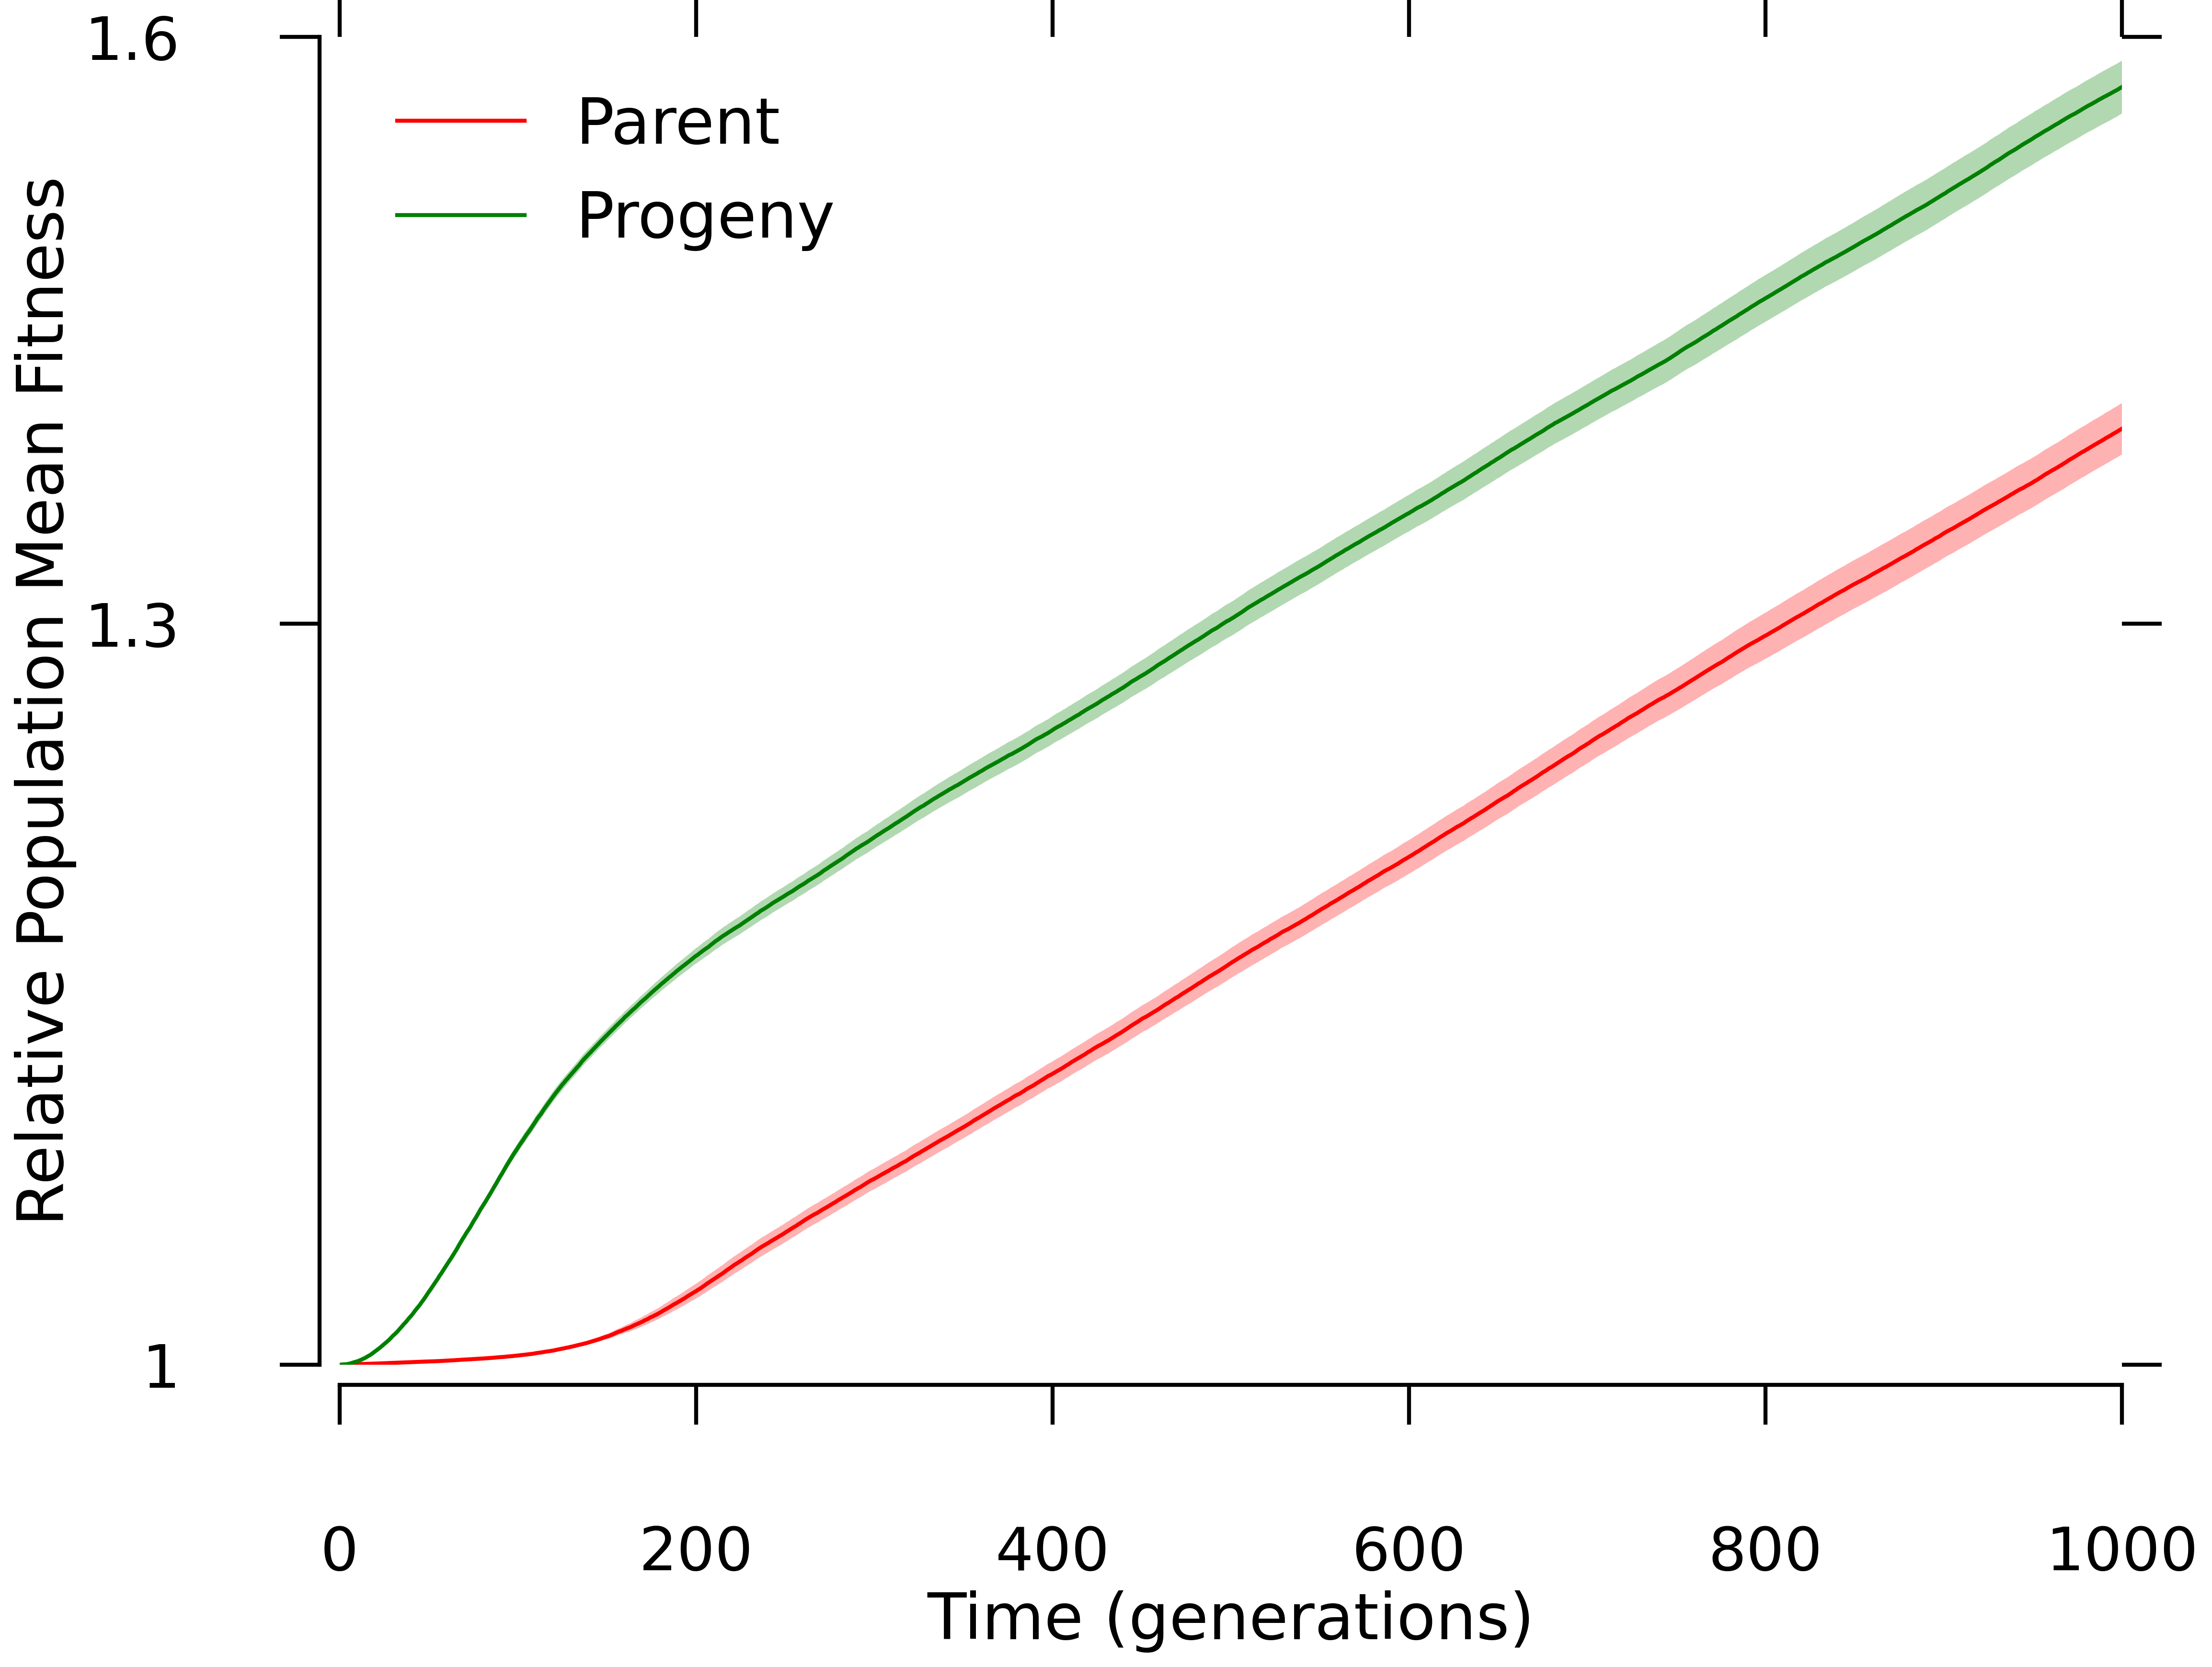

In [16]:
fig = plt.figure(figsize=(16, 12), dpi =300)
ax = fig.add_subplot(111)
publication_figure(ax)
# ax.scatter(0,0)

ax.set_xlim(0,1000)

t = generation_list

a1 = t1_fit_rel_mean_p
error_a1 = list(1.98* np.array(t1_fit_rel_std_p)/((100)**0.5))


a2 = t1_fit_rel_mean_o
error_a2 = list(1.98* np.array(t1_fit_rel_std_o)/((100)**0.5))


# ax.set_title('Relative Fitness Dynamics_N3K_U3S3L5_Parent B Data', fontsize =30)
ax.set_xlabel('Time (generations)', fontsize =32)
ax.set_ylabel('Relative Population Mean Fitness', fontsize =32)



ax.set_yscale('log')

ax.plot(t,a1,'r', label = 'Parent',  linewidth=2.0, alpha =1)
ax.fill_between(t, np.array(a1)- np.array(error_a1), np.array(a1)+ np.array(error_a1), alpha =0.3, facecolor='r')


ax.plot(t,a2,'g', label = 'Progeny',  linewidth=2.0, alpha =1)
ax.fill_between(t, np.array(a2)- np.array(error_a2), np.array(a2)+ np.array(error_a2), alpha =0.3, facecolor='g')


ax.minorticks_off()

plt.legend(loc='best', frameon= False, prop={'size':32})


extraticks=[1, 1.6]
ax.set_yticks(list(ax.get_yticks()) + extraticks)

ax.set_yticks([1, 1.3, 1.6]) # choose which x locations to have ticks
ax.set_yticklabels([1, 1.3, 1.6]) # set the labels to display at those ticks 

ax.set_ylim(1, 1.6)

# Figure 5

In [38]:
t1_pop_file = ['Pop_Mut_Amito_N3K_S003_GMU003_L5_Parent_210407B.csv', 'Pop_Mut_Amito_N3K_S003_GMU003_L5_Offspring_210407B.csv']

t1_pop = get_pop_mut_data(t1_pop_file)

t1_pop_fix_mean =t1_pop[0]
t1_pop_fix_std = t1_pop[1]

t1_pop_wt_mean =t1_pop[2]
t1_pop_wt_std = t1_pop[3]

t1_pop_pm_mean =t1_pop[4]
t1_pop_pm_std = t1_pop[5]

t1_pop_mutnum_mean =t1_pop[6]
t1_pop_mutnum_std = t1_pop[7]

t1_pop_mutnum_per_ind_mean =t1_pop[8]
t1_pop_mutnum_per_ind_std = t1_pop[9]

In [39]:
def publication_figure2(axis):
    plt.rcParams.update({'font.size': 35})
    ax = axis
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    #ax.xaxis.set_ticks([])
    ax.tick_params(axis='x', which='both', bottom='on', top='off',labelbottom='on', size=20, width=3, direction='out', pad=50, colors='black')
    ax.tick_params(axis='y', which='both', left='on', right='off',labelbottom='on', size=20, width=3, direction='out', pad=50, colors='black')

### Fig 5(A)

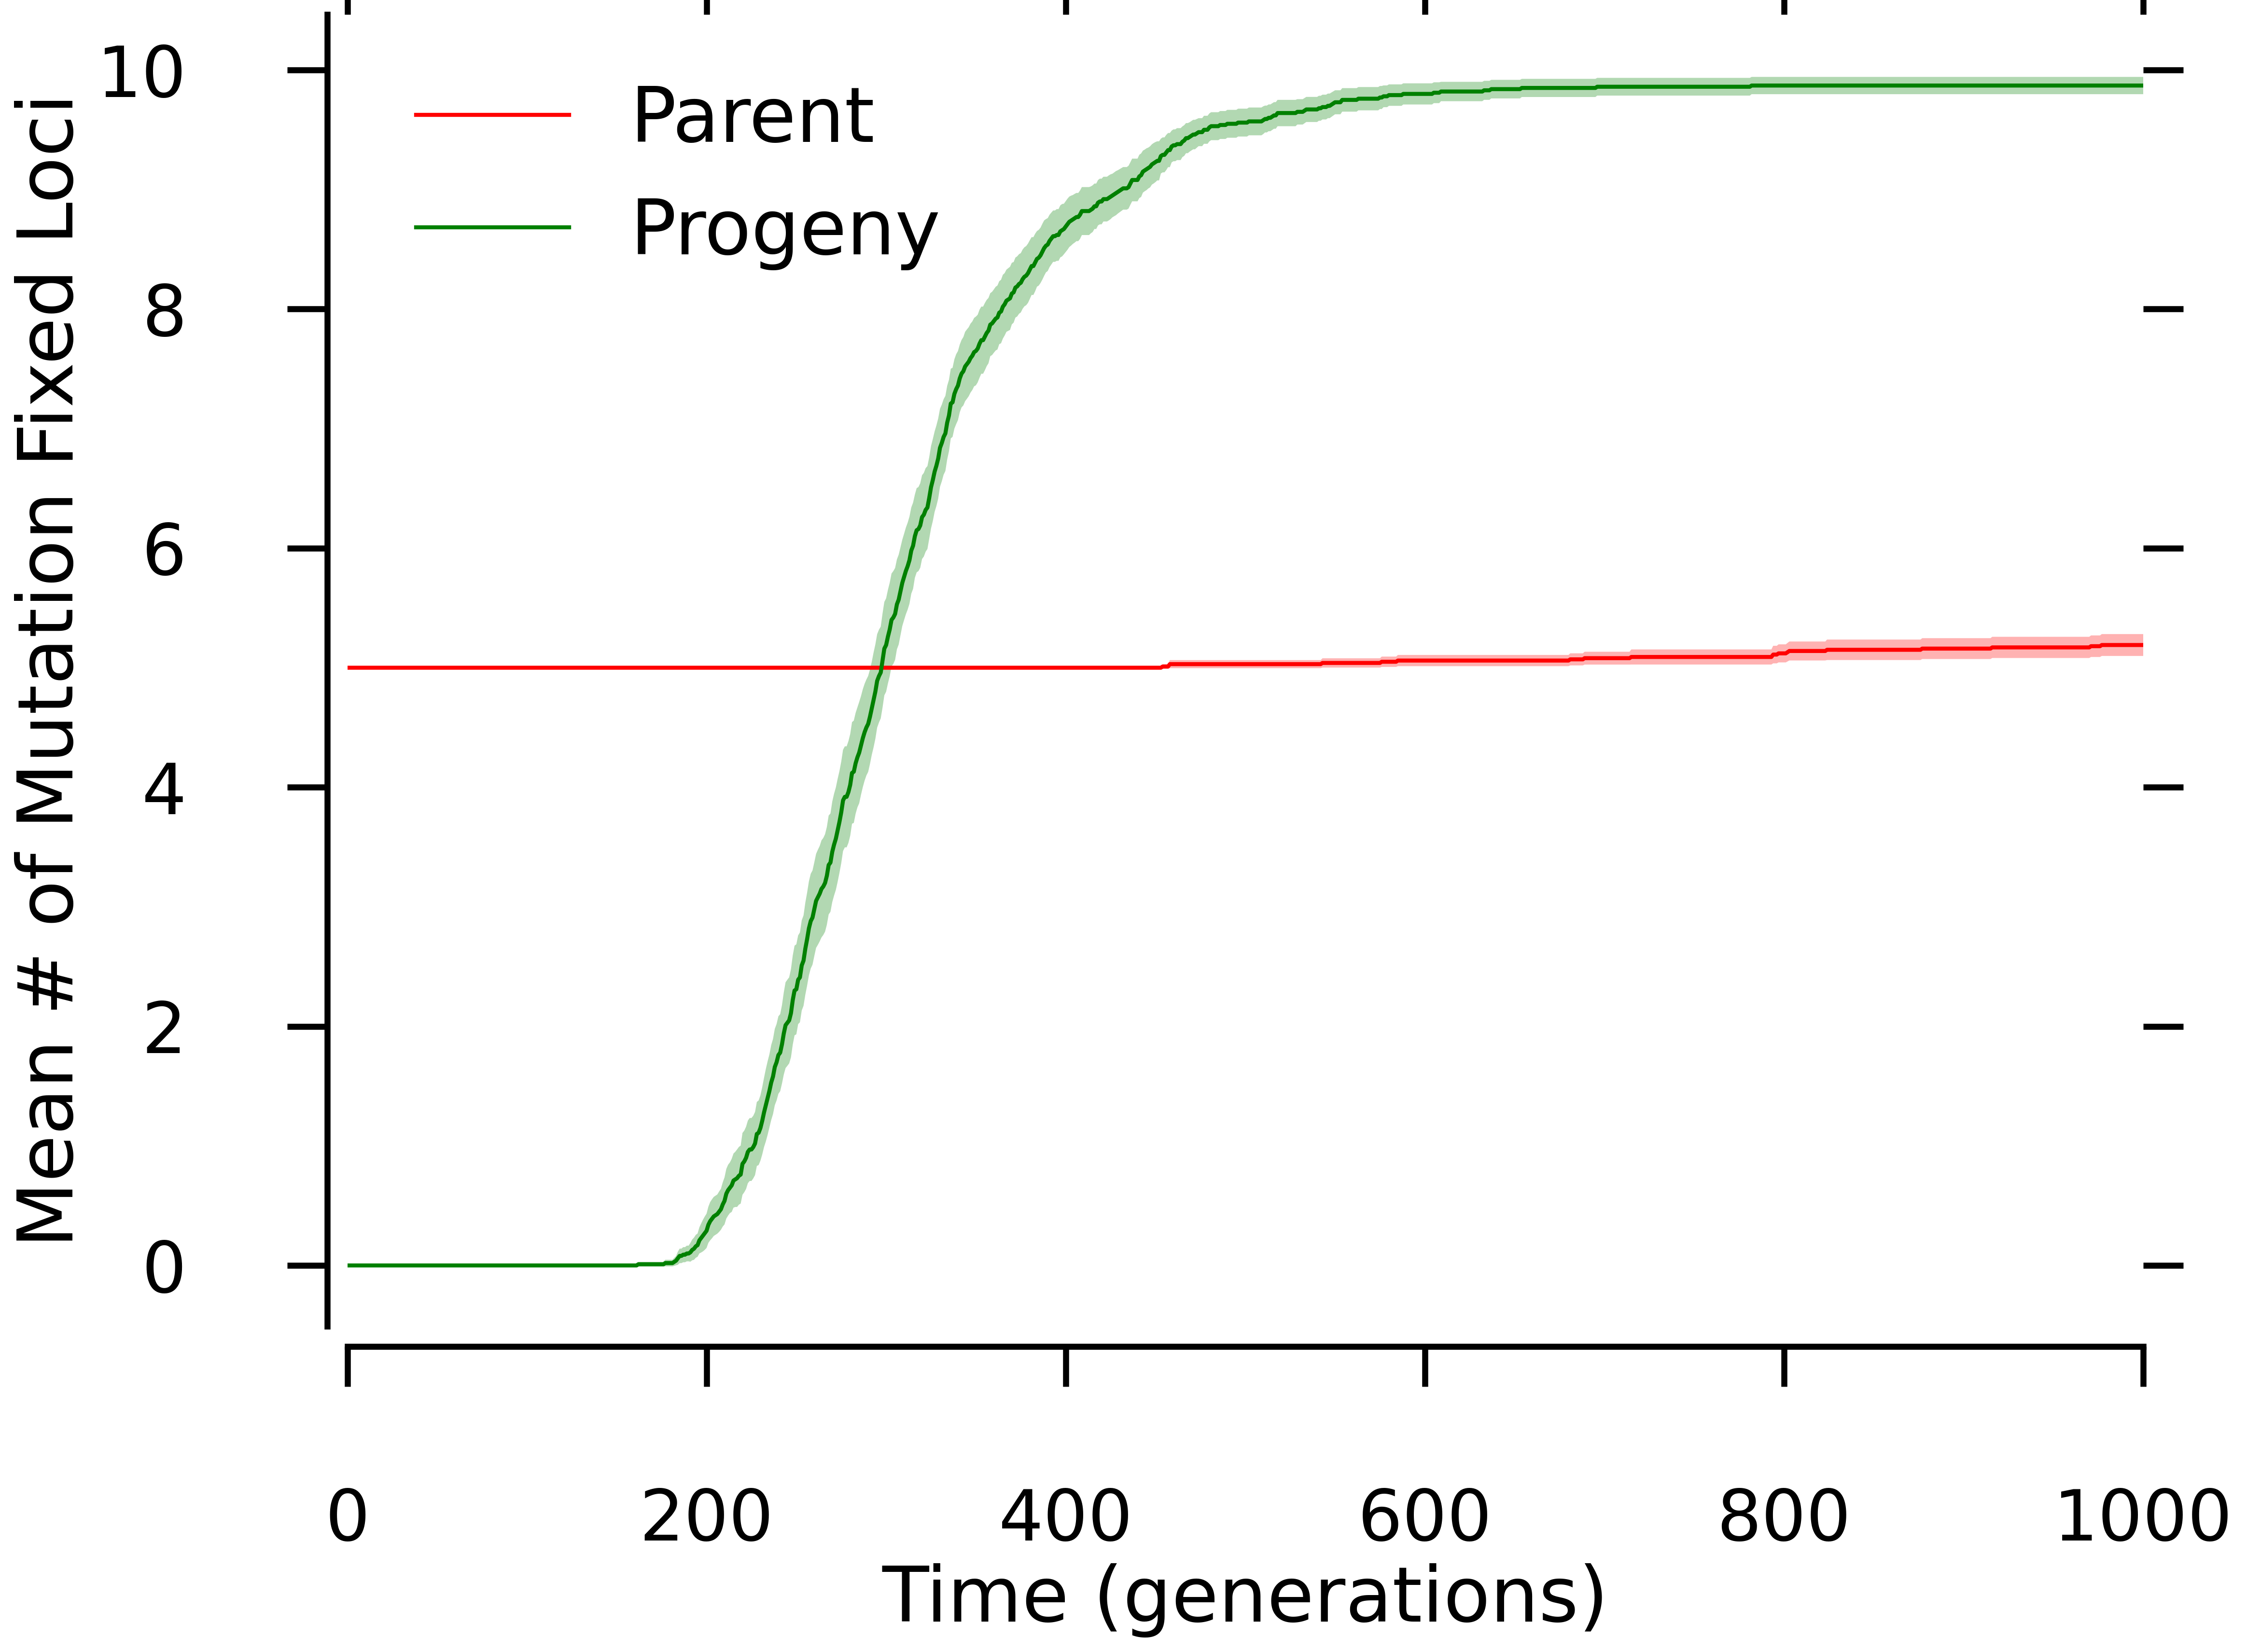

In [40]:
fig = plt.figure(figsize=(16, 12), dpi =300)
ax = fig.add_subplot(111)
publication_figure2(ax)
# ax.scatter(0,0)

ax.set_xlim(0,1000)

t = generation_list

a1 = np.array(t1_pop_fix_mean[0])
error_a1 = list(1.98* np.array(t1_pop_fix_std[0])/((100)**0.5))


a2 = t1_pop_fix_mean[1]
error_a2 = list(1.98* np.array(t1_pop_fix_std[1])/((100)**0.5))


# ax.set_title('Pop Fixed Loci Number_N3K_U3S3L5_Parent B Data', fontsize =30)
ax.set_xlabel('Time (generations)', fontsize =38)
ax.set_ylabel('Mean # of Mutation Fixed Loci', fontsize =38)



ax.plot(t,a1,'r', label = 'Parent',  linewidth=2.0, alpha =1)
ax.fill_between(t, np.array(a1)- np.array(error_a1), np.array(a1)+ np.array(error_a1), alpha =0.3, facecolor='r')


ax.plot(t,a2,'g', label = 'Progeny',  linewidth=2.0, alpha =1)
ax.fill_between(t, np.array(a2)- np.array(error_a2), np.array(a2)+ np.array(error_a2), alpha =0.3, facecolor='g')


ax.minorticks_off()



plt.legend(loc=2, frameon=False, prop={'size':38})




# plt.show()
# plt.gca().get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x/1000), ',')))

### Fig 5(B)

(0.0, 450.0)

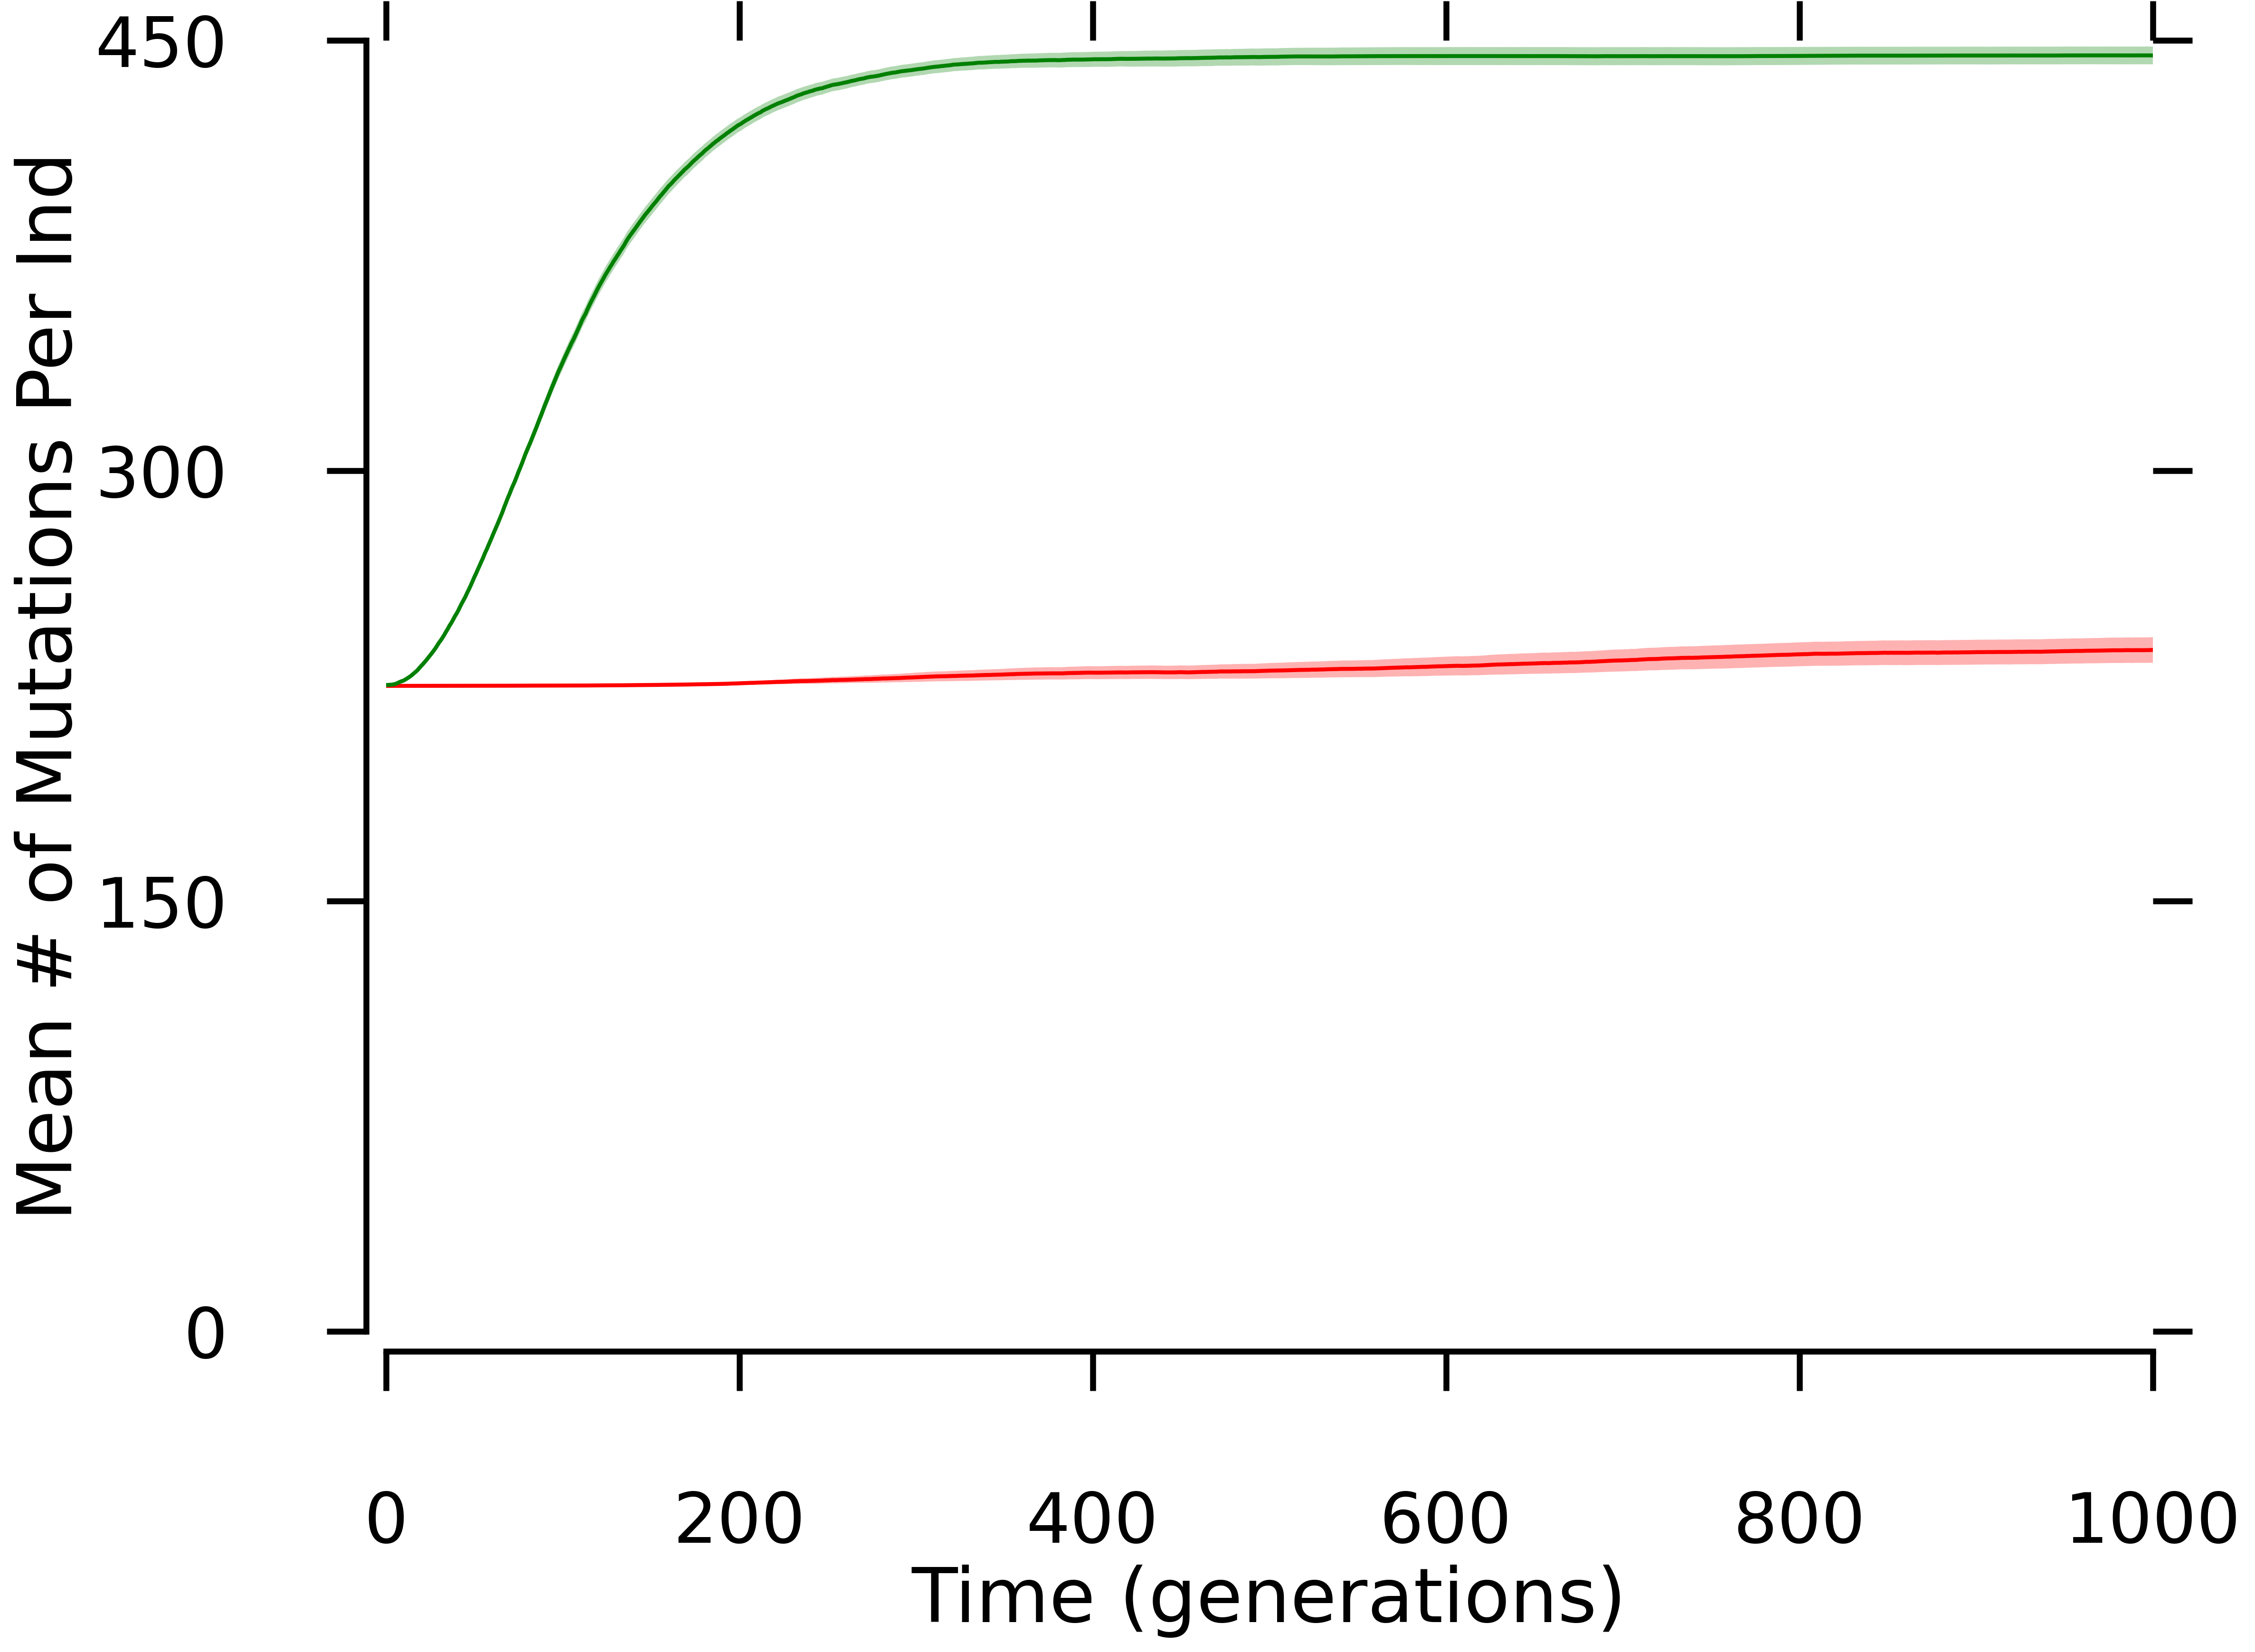

In [41]:
fig = plt.figure(figsize=(16, 12), dpi =300)
ax = fig.add_subplot(111)
publication_figure2(ax)
# ax.scatter(0,0)

ax.set_xlim(0,1000)

t = generation_list

a1 = t1_pop_mutnum_per_ind_mean[0]
error_a1 = list(1.98* np.array(t1_pop_mutnum_per_ind_std[0])/((100)**0.5))


a2 = t1_pop_mutnum_per_ind_mean[1]
error_a2 = list(1.98* np.array(t1_pop_mutnum_per_ind_std[1])/((100)**0.5))


# ax.set_title('Pop Mut # Per Locus_N3K_U3S3L5_Parent B Data (excluding initially fixed loci)', fontsize =30)
ax.set_xlabel('Time (generations)', fontsize =38)
ax.set_ylabel('Mean # of Mutations Per Ind', fontsize =38)



ax.plot(t,a1,'r', label = 'Parent',  linewidth=2.0, alpha =1)
ax.fill_between(t, np.array(a1)- np.array(error_a1), np.array(a1)+ np.array(error_a1), alpha =0.3, facecolor='r')


ax.plot(t,a2,'g', label = 'Progeny',  linewidth=2.0, alpha =1)
ax.fill_between(t, np.array(a2)- np.array(error_a2), np.array(a2)+ np.array(error_a2), alpha =0.3, facecolor='g')


ax.minorticks_off()


ax.set_yticks([0, 150, 300, 450])

ax.set_ylim(0, 450)

